<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-function $-NTP-=-f(\alpha,-x_b,-y_b,-x_d,-y_d)$" data-toc-modified-id="The-function&nbsp;$-NTP-=-f(\alpha,-x_b,-y_b,-x_d,-y_d)$-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The function&nbsp;$ NTP = f(\alpha, x_b, y_b, x_d, y_d)$</a></span><ul class="toc-item"><li><span><a href="#Examples" data-toc-modified-id="Examples-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Examples</a></span></li><li><span><a href="#Source-Code-for-the-function:-ntp_a(alpha,xb,yb,xd,yd)" data-toc-modified-id="Source-Code-for-the-function:-ntp_a(alpha,xb,yb,xd,yd)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Source Code for the function: ntp_a(alpha,xb,yb,xd,yd)</a></span></li></ul></li><li><span><a href="#The-function $[x_b,-y_d]-=-f(y_b,x_d,\alpha,-NTP)$" data-toc-modified-id="The-function&nbsp;$[x_b,-y_d]-=-f(y_b,x_d,\alpha,-NTP)$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The function&nbsp;$[x_b, y_d] = f(y_b,x_d,\alpha, NTP)$</a></span><ul class="toc-item"><li><span><a href="#Interactive-test" data-toc-modified-id="Interactive-test-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Interactive test</a></span></li><li><span><a href="#Source-Code-for-the-function:-xb_yd(yb,-xd,-alpha, ntp)" data-toc-modified-id="Source-Code-for-the-function:-xb_yd(yb,-xd,-alpha,&nbsp;ntp)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Source Code for the function: xb_yd(yb, xd, alpha,&nbsp;ntp)</a></span></li></ul></li></ul></div>

In [1]:
from IPython.display import display, Latex, Markdown
import inspect
def ShowSource(*args,sep='\n',**kwargs):
  return Markdown(f"""
```Python 
{sep.join(map(inspect.getsource, args))}
```""")
def dictToArgString(kwargs):
  return ', '.join(f'{kw}={value}' for kw,value in kwargs.items())

In [2]:
import matplotlib.pyplot as plt
import numpy

# The function $ NTP = f(\alpha, x_b, y_b, x_d, y_d)$

## Examples

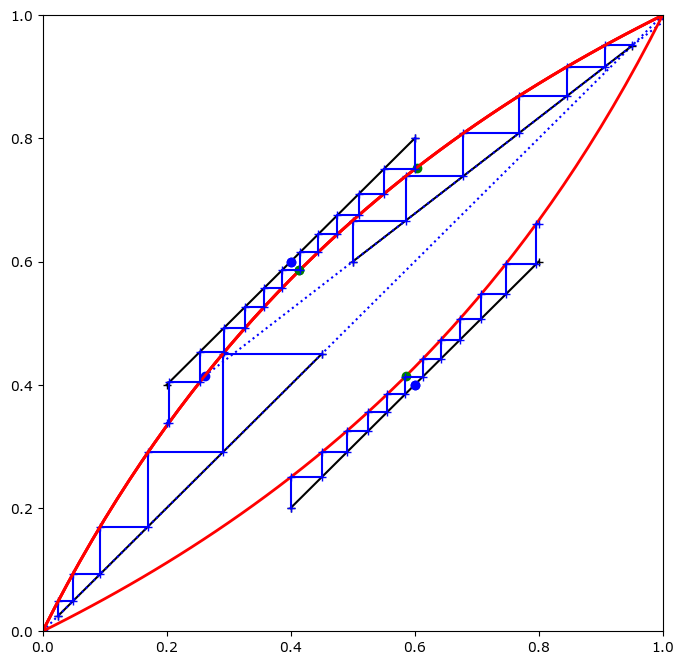

ntp_a(alpha=2, xb=0.024930748, yb=0.024930748, xd=0.45, yd=0.45) = 5.00000000
ntp_a(alpha=2, xb=0.5, yb=0.6, xd=0.95, yd=0.95) = 5.96437734
ntp_a(alpha=2, xb=0.2, yb=0.4, xd=0.6, yd=0.8) = -11.06997133
ntp_a(alpha=0.5, xb=0.4, yb=0.2, xd=0.8, yd=0.6) = 11.06997133


In [3]:
from ntp import plotMcCabe,ntp_a

examples=(dict(alpha=2,xb=0.024930748,yb=0.024930748,xd=0.45,yd=0.45),
         dict(alpha=2,xb=0.5,yb=0.6,xd=0.95,yd=0.95),
         dict(alpha=2,xb=0.2,yb=0.4,xd=0.6,yd=0.8),
         dict(alpha=0.5,xb=0.4,yb=0.2,xd=0.8,yd=0.6))
%matplotlib inline
plt.close()
fig,ax=plt.subplots(figsize=(8,8))
for example in examples: plotMcCabe(**example,ax=ax)
plt.show()
for example in examples: 
    print(f'ntp_a({dictToArgString(example)}) = {ntp_a(**example):.8f}')

## Source Code for the function: ntp_a(alpha,xb,yb,xd,yd)

In [4]:
from ntp import ntp_a,zeros,y_eq
ShowSource(y_eq,zeros,ntp_a)


```Python 
def y_eq(x,alpha):
  return x*alpha/(x*(alpha-1)+1)

def zeros(alpha,x0,y0,lg):
  #calculate the intersection points between operating line and equilibrium line
  b=((alpha-1)*(x0*lg+(1-y0)) + 1 - lg )
  d=((b+2.0*lg)**2 -4.0*alpha*lg + 0j)**0.5 # add 0j to force complex evaluation
  return np.array([b - d, b + d])/(2.0*lg*(alpha-1))

def ntp_a(alpha,xb,yb,xd,yd):
  lg=(yd-yb)/(xd-xb)
  xz=zeros(alpha,xb,yb,lg)
  yz=y_eq(xz,alpha)
  b=alpha**-0.5
  scale=1/b-b
  b1=b+xz[0]*scale
  b2=b+(1-yz[1])*scale
  alphaz=1/(b1*b2)
#  x_scale=(1/b2-b1)
#  y_scale=(1/b1-b2)
#  xb_=(b-b1+xb*scale)/x_scale 
#  yd_=1-(b-b2+(1-yd)*scale)/y_scale
  xb_=(xb-xz[0])/(xz[1]-xz[0])
  yd_=1-(yz[1]-yd)/(yz[1]-yz[0])
  # keep the phase angle of complex arguments to log(x) within +-180°, 
  # otherwise the result may be off by i*2pi:
  return ((np.log(yd_/(1-yd_))-np.log(xb_/(1-xb_)))/np.log(alphaz)).real 

```

***

In [5]:
#code for the interactive test of the function xb_yd(yb, xd, LG, alpha, NTP)
import matplotlib.pyplot as plt
import numpy

%matplotlib notebook
from ntp import plotMcCabe,ntp_a,xb_yd

Data=dict(alpha=0.7, yb=0.1, xd=0.6, LG=1.2, NTP=6.0)

def update_plot():
  alpha, yb, xd, LG, NTP = [Data[key] for key in ('alpha','yb','xd','LG','NTP')]

  xb, yb, xd, yd = xb_yd(yb=yb, xd=xd, lg=LG, alpha=alpha, ntp=NTP)

  output.clear_output(wait=True)
  with output:
    %matplotlib inline
    fig,ax=plt.subplots(figsize=(8,8))
    ax.set_aspect(1.0)
    plotMcCabe(alpha,xb,yb,xd,yd,ax=ax)
    plt.plot((xd,xd),(0,1),'k',lw=0.5)
    plt.plot((0,1),(yb,yb),'k',lw=0.5)
    plt.show()
    plt.close()
  output2.clear_output(wait=True)
  with output2:
    print(f'ntp_a(alpha={alpha:.6f},xb={xb:.6f},yb={yb:.6f},xd={xd:.6f},yd={yd:.6f}) = {ntp_a(alpha,xb,yb,xd,yd):.6f}')

from ipywidgets import widgets,HBox,VBox
output=widgets.Output()
output2=widgets.Output()

def handle_change(msg):
  Data[msg['owner'].description] = msg['new']
  update_plot()

widgetList=dict()

key='alpha'
widgetList[key]=widgets.FloatLogSlider(description=key,
            min=-0.7,max=0.7,value=Data[key],step=0.01,continuous_update=False, orientation='vertical',
            readout_format='0.3f')
key='LG'
widgetList[key]=widgets.FloatLogSlider(description=key,
            min=-0.7,max=0.7,value=Data[key],step=0.01,continuous_update=False, orientation='vertical',
            readout_format='0.3f')
key='NTP'
widgetList[key]=widgets.FloatLogSlider(description=key,
            min=0.0,max=1.7,value=Data[key],step=0.01,continuous_update=False, orientation='vertical',
            readout_format='0.3f')
key='yb'
widgetList[key]=widgets.FloatSlider(description=key,
            min=0.0,max=1.0,value=Data[key],step=0.01,continuous_update=False, orientation='vertical',
            readout_format='0.3f')
key='xd'
widgetList[key]=widgets.FloatSlider(description=key,
            min=0.0,max=1.0,value=Data[key],step=0.01,continuous_update=False, orientation='horizontal',
            readout_format='0.3f')

for w in widgetList.values():
    w.observe(handle_change,'value')
    if w.orientation=='horizontal':
      w.layout.width='100%'
    else:
      w.layout.height='100%'

McCabeLayout=VBox((HBox((VBox((widgetList['xd'],output)),
        HBox(list(widgetList[key] for key in ['yb','alpha','LG','NTP'])))),output2))


# The function $[x_b, y_d] = f(y_b,x_d,\alpha, NTP)$

## Interactive test

In [6]:
display(McCabeLayout); update_plot()

## Source Code for the function: xb_yd(yb, xd, alpha, ntp)

In [7]:
from ntp import xb_yd,y_eq,dy_eq_dx,x_eq,root
ShowSource(y_eq,dy_eq_dx,x_eq,root,xb_yd)


```Python 
def y_eq(x,alpha):
  return x*alpha/(x*(alpha-1)+1)

def dy_eq_dx(x,alpha):
  return alpha/(x*(alpha - 1) + 1)**2

def x_eq(y,alpha):
  return 1-y_eq(1-y,alpha)

def root(f,x1,x2,eps=1e-6,maxit=100):
  y1=f(x1)
  y2=f(x2)
  if (y1>0)==(y2>0):
    raise Exception(f'root: no sign change in interval [{x1},{x2}]: f({x1})={y1}, f({x2})={y2}')
  it=0
  while(abs(x1-x2)>eps):
      it+=1
      x=(x1+x2)/2
      y=f(x)
      if (y<0)==(y1<0):
        x1=x
        y1=y
      else:
        x2=x
        y2=y
  return x1 if abs(y1)<abs(y2) else x2

def xb_yd(yb,xd,lg,alpha,ntp,test=False,newton=False):
  yd_min=yb
  yed=y_eq(xd,alpha)
  yd_pinch=yed#pinch at xd
  xb_pinch=xd-(yd_pinch-yb)/lg
  m=dy_eq_dx(xd,alpha)
  dy_pinch=(lg-m)*(xd-xb_pinch)/((m/lg)**-ntp-1)
  xeb=x_eq(yb,alpha)
  yd_pinch_=yb+lg*(xd-xeb)#pinch at xb
  if (yd_pinch_<yd_pinch)!=(yd_pinch_<yd_min):
    yd_pinch=yd_pinch_
    xb_pinch=xeb
    m=dy_eq_dx(xeb,alpha)
    dx_pinch=(1/lg-1/m)*((xd-xb_pinch)*lg)/((lg/m)**-ntp-1)
    dy_pinch=dx_pinch*lg
  xp=((alpha/lg)**0.5-1)/(alpha-1)#m=l/g 
  if (xp<xeb)!=(xp<xd):
    yep=y_eq(xp,alpha)
    yd_pinch_=yep+lg*(xd-xp)#pinch at m=l/g
    if (yd_pinch_<yd_pinch)!=(yd_pinch_<yd_min):
      yd_pinch=yd_pinch_
      dy_pinch=(yd_pinch-yb)/ntp
  def xb_yb_xd_yd(t):#return operating line with yd between yd_min and yd_pinch for t between -inf to inf
    yd=yd_pinch-(yd_pinch-yd_min)*1/(1+np.exp(t))#use logistic function 
    xb=xd-(yd-yb)/lg
    return (xb,yb,xd,yd)
#  return xb_yb_xd_yd(newton(lambda t:ntp-ntp_a(alpha,*xb_yb_xd_yd(t)),0))
  if test: return xb_yb_xd_yd(ntp)
  t_est=np.log(1/(dy_pinch/(yd_pinch-yd_min))-1)
  if newton:
    t_calc=newton(lambda t:ntp-ntp_a(alpha,*xb_yb_xd_yd(t)),t_est)
  else:
    t1=t_est
    t2=t_est
    n_est1=ntp_a(alpha,*xb_yb_xd_yd(t_est))
    n_est2=n_est1
    while (n_est1<ntp)==(n_est2<ntp):
      if not(n_est1<ntp):
        t1-=1
        n_est1=ntp_a(alpha,*xb_yb_xd_yd(t1))
      if (n_est2<ntp):
        t2+=1
        n_est2=ntp_a(alpha,*xb_yb_xd_yd(t2))
  #  print(f't1:{t1},n_est1:{n_est1},t2:{t2},n_est2:{n_est2}')
    t_calc=root(lambda t:ntp-ntp_a(alpha,*xb_yb_xd_yd(t)),t1,t2)
  #  print(f't_est:{t_est},t_calc:{t_calc}')
  return xb_yb_xd_yd(t_calc)  

```